#**Feedback Prize English Language Learning**
The goal is to assess the language proficiency of 8th-12th grade English Language Learners (ELLs). Utilizing a dataset of essays written by ELLs will help to develop proficiency models that better supports all students.

This will help ELLs receive more accurate feedback on their language development and expedite the grading cycle for teachers. These outcomes could enable ELLs to receive more appropriate learning tasks that will help them improve their English language proficiency.

The dataset presented here (the ELLIPSE corpus) comprises argumentative essays written by 8th-12th grade English Language Learners (ELLs). The essays have been scored according to six analytic measures: **cohesion, syntax, vocabulary, phraseology, grammar, and conventions.**

Each measure represents a component of proficiency in essay writing, with greater scores corresponding to greater proficiency in that measure. The scores range from** 1.0 to 5.0** in increments of 0.5. Your task is to predict the score of each of the six measures for the essays given in the test set.

###Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Getting data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/feedback-prize-english-language-learning/train.csv')
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [ ]:
df.isna().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

###Preprocessing and visualizie data

In [ ]:
df['cohesion'].value_counts()

3.0    1096
3.5     988
2.5     790
4.0     534
2.0     315
4.5     125
1.5      27
5.0      26
1.0      10
Name: cohesion, dtype: int64

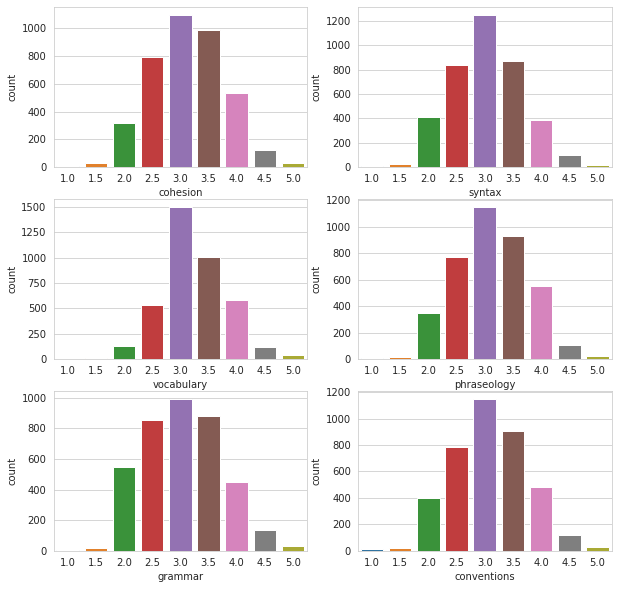

In [ ]:
sns.set_style('whitegrid')
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
sns.countplot(data=df,x='cohesion',ax=ax1)
sns.countplot(data=df,x='syntax',ax=ax2)
sns.countplot(data=df,x='vocabulary',ax=ax3)
sns.countplot(data=df,x='phraseology',ax=ax4)
sns.countplot(data=df,x='grammar',ax=ax5)
sns.countplot(data=df,x='conventions',ax=ax6)

In [3]:
## total words
total_words = []
for i in df['full_text']:
  i = i.split()
  total_words.append(len(i))

df['total_words'] = total_words

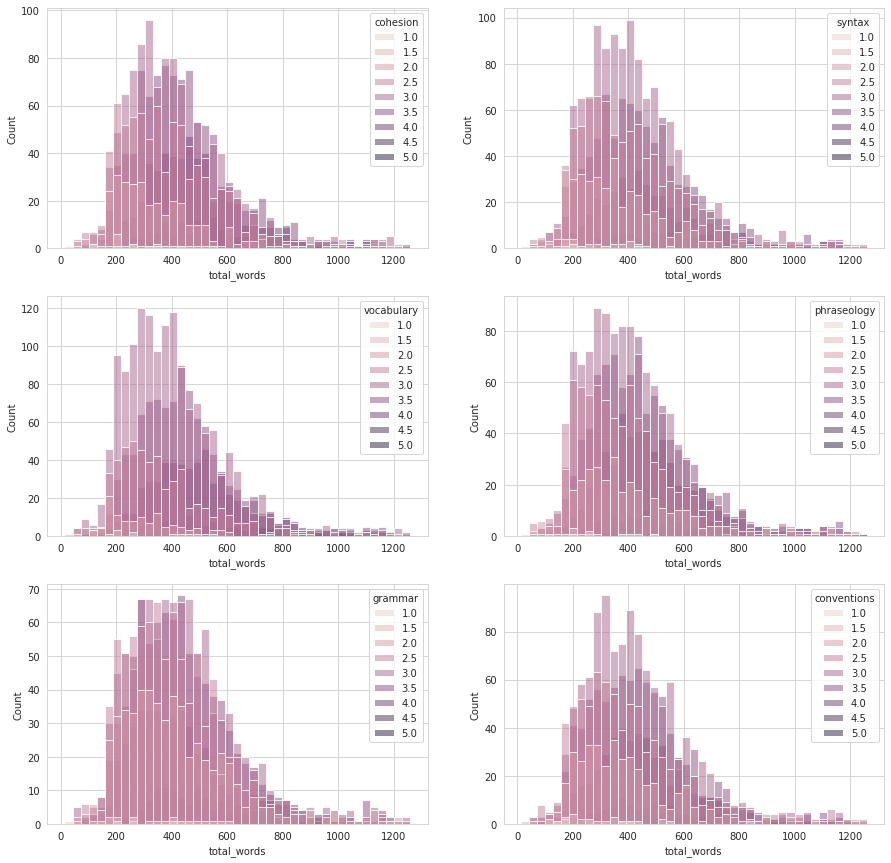

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(15,15))
sns.histplot(data=df,hue='cohesion',ax=ax1,x='total_words')
sns.histplot(data=df,hue='syntax',ax=ax2,x='total_words')
sns.histplot(data=df,hue='vocabulary',ax=ax3,x='total_words')
sns.histplot(data=df,hue='phraseology',ax=ax4,x='total_words')
sns.histplot(data=df,hue='grammar',ax=ax5,x='total_words')
sns.histplot(data=df,hue='conventions',ax=ax6,x='total_words')

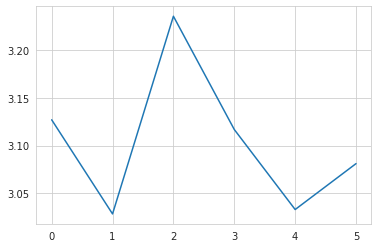

In [ ]:
avg_score = [df['cohesion'].mean(),df['syntax'].mean(),df['vocabulary'].mean(),df['phraseology'].mean(),df['grammar'].mean(),df['conventions'].mean()]
plt.plot(avg_score)

In [4]:
x = df['full_text']
y = df.drop(['full_text','text_id','total_words'],axis=1)

###Train and Test split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42,)
for train_index,test_index in split.split(x,y):
  x_train = x.loc[train_index]
  x_test = x.loc[test_index]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

###Converting text into number

In [6]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

a = []
for i in x_train:
  i = i.split()
  for j in i:
    a.append(j)
## length of vocab
len(set(a))

36525

In [ ]:
# getting the size of the output token
np.percentile(total_words,95)

788.0

In [7]:
text_vector = TextVectorization(max_tokens=37000,output_sequence_length=800)
text_vector.adapt(x_train)

In [8]:
## creating embedding
from tensorflow.keras import layers

embed = layers.Embedding(input_dim=37000,output_dim=128,input_length=800,mask_zero=True)

###Running Model Experiments


1.   Model0:Feed Fordward Neural Net(Dense Model)
2.   Model1:LSTM(RNN)
3.   Model2:Bidirectional(RNN)
4.   Model3:1D CNN
5.   Model4:Tensorflow Hub Pre-Trained(Feature Extractor)
6.   Model5:Tensorflow Hub Pre-Trained(Fine Tuning)



####Model0:Feed Fordward Neural Net(Dense Model)

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vector(inputs)
x = embed(x)

x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.25)(x)

output_1 = layers.Dense(1,activation='relu',name='o1')(x)
output_2 = layers.Dense(1,activation='relu',name='o2')(x)
output_3 = layers.Dense(1,activation='relu',name='o3')(x)
output_4 = layers.Dense(1,activation='relu',name='o4')(x)
output_5 = layers.Dense(1,activation='relu',name='o5')(x)
output_6 = layers.Dense(1,activation='relu',name='o6')(x)

model_0 = tf.keras.Model(inputs=inputs,outputs=[output_1,output_2,output_3,output_4,output_5,output_6])
model_0.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 800)         0           ['input_1[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding (Embedding)          (None, 800, 128)     4736000     ['text_vectorization[0][0]']     
                                                                                                  
 dense (Dense)                  (None, 800, 256)     33024       ['embedding[0][0]']          

In [10]:
## compiling the model
model_0.compile(loss={'o1':tf.keras.losses.MeanSquaredError(),
                      'o2':tf.keras.losses.MeanSquaredError(),
                      'o3':tf.keras.losses.MeanSquaredError(),
                      'o4':tf.keras.losses.MeanSquaredError(),
                      'o5':tf.keras.losses.MeanSquaredError(),
                      'o6':tf.keras.losses.MeanSquaredError()},
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [11]:
## fitting the model
model_0.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=[x_test,y_test])

Epoch 1/10
98/98 [==============================] - 39s 377ms/step - loss: 19.4063 - o1_loss: 2.8779 - o2_loss: 2.9882 - o3_loss: 3.2033 - o4_loss: 4.7395 - o5_loss: 2.7906 - o6_loss: 2.8069 - o1_root_mean_squared_error: 1.6964 - o2_root_mean_squared_error: 1.7286 - o3_root_mean_squared_error: 1.7898 - o4_root_mean_squared_error: 2.1770 - o5_root_mean_squared_error: 1.6705 - o6_root_mean_squared_error: 1.6754 - val_loss: 2.3331 - val_o1_loss: 0.3849 - val_o2_loss: 0.4022 - val_o3_loss: 0.3955 - val_o4_loss: 0.3932 - val_o5_loss: 0.3790 - val_o6_loss: 0.3783 - val_o1_root_mean_squared_error: 0.6204 - val_o2_root_mean_squared_error: 0.6342 - val_o3_root_mean_squared_error: 0.6289 - val_o4_root_mean_squared_error: 0.6271 - val_o5_root_mean_squared_error: 0.6156 - val_o6_root_mean_squared_error: 0.6151
Epoch 2/10
98/98 [==============================] - 26s 269ms/step - loss: 4.3716 - o1_loss: 0.6873 - o2_loss: 0.7437 - o3_loss: 0.7305 - o4_loss: 0.8859 - o5_loss: 0.6542 - o6_loss: 0.6701 

Model Prediction and Evaluation

In [12]:
## prediction
def prediction(model,x_test=x_test):
  preds = model.predict(x_test)
  preds = np.array(preds)
  preds = preds.reshape((6,783))
  return preds

In [27]:
preds_0=prediction(model_0)

In [14]:
### evaluation
from sklearn.metrics import mean_squared_error
def evaluate(y_preds,y_true=y_test):
  l1=[]
  y_true = y_true.to_numpy()
  for i in range(0,6):
    error = mean_squared_error(y_true[:,i],y_preds[i])
    error = error**0.5
    l1.append(error)
  return np.mean(l1)

In [28]:
evaluate(preds_0)

1.2947181688693228

In [ ]:
### trying for submission
test_data = pd.read_csv('/content/drive/MyDrive/data/feedback-prize-english-language-learning/test.csv')
test_data.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [ ]:
test_preds = model_0.predict(test_data['full_text'])

In [ ]:
test_preds=np.array(test_preds)
test_preds.reshape((6,3))

array([[2.9593143, 3.23344  , 3.0460696],
       [2.9461133, 3.2059767, 3.0322142],
       [2.9671435, 3.2254581, 3.0485315],
       [2.956882 , 3.223391 , 3.0481193],
       [2.9467063, 3.213476 , 3.0350418],
       [2.9579782, 3.231196 , 3.0444694]], dtype=float32)

In [ ]:
sub = pd.DataFrame(test_data['text_id'])
sub['cohesion']=test_preds[0]
sub['syntax'] = test_preds[1]
sub['vocabulary']=test_preds[2]
sub['phraseology'] = test_preds[3]
sub['grammar']=test_preds[4]
sub['conventions']=test_preds[5]
sub



,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.959314,2.946113,2.967144,2.956882,2.946706,2.957978
1,000BAD50D026,3.233440,3.205977,3.225458,3.223391,3.213476,3.231196
2,00367BB2546B,3.046070,3.032214,3.048532,3.048119,3.035042,3.044469


In [ ]:
sub.to_csv('/content/drive/MyDrive/data/feedback-prize-english-language-learning/sub_model_0.csv',index=False)

####Model1:LSTM(RNN)

In [18]:
## create model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vector(inputs)
x = embed(x)

x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128,return_sequences=True)(x)

x = layers.LSTM(64,return_sequences=True)(x)
x = layers.LSTM(64)(x)

x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.4)(x)

output_1 = layers.Dense(1,activation='relu',name='o1')(x)
output_2 = layers.Dense(1,activation='relu',name='o2')(x)
output_3 = layers.Dense(1,activation='relu',name='o3')(x)
output_4 = layers.Dense(1,activation='relu',name='o4')(x)
output_5 = layers.Dense(1,activation='relu',name='o5')(x)
output_6 = layers.Dense(1,activation='relu',name='o6')(x)

model_1 = tf.keras.Model(inputs=inputs,outputs=[output_1,output_2,output_3,output_4,output_5,output_6])
model_1.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 800)         0           ['input_2[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding (Embedding)          (None, 800, 128)     4736000     ['text_vectorization[1][0]']     
                                                                                                  
 lstm (LSTM)                    (None, 800, 128)     131584      ['embedding[1][0]']        

In [19]:
## compiling the model
model_1.compile(loss={'o1':tf.keras.losses.MeanSquaredError(),
                      'o2':tf.keras.losses.MeanSquaredError(),
                      'o3':tf.keras.losses.MeanSquaredError(),
                      'o4':tf.keras.losses.MeanSquaredError(),
                      'o5':tf.keras.losses.MeanSquaredError(),
                      'o6':tf.keras.losses.MeanSquaredError()},
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [20]:
## adding call backs
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min')

In [21]:
## fitting the model
valid_data = (x_test,y_test)
model_1.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=valid_data,callbacks=[early_stop])

Epoch 1/10
98/98 [==============================] - 383s 4s/step - loss: 14.5604 - o1_loss: 1.7580 - o2_loss: 1.8238 - o3_loss: 1.6883 - o4_loss: 1.7714 - o5_loss: 4.7888 - o6_loss: 2.7300 - o1_root_mean_squared_error: 1.3259 - o2_root_mean_squared_error: 1.3505 - o3_root_mean_squared_error: 1.2993 - o4_root_mean_squared_error: 1.3310 - o5_root_mean_squared_error: 2.1883 - o6_root_mean_squared_error: 1.6523 - val_loss: 3.1281 - val_o1_loss: 0.4720 - val_o2_loss: 0.5285 - val_o3_loss: 0.5153 - val_o4_loss: 0.5434 - val_o5_loss: 0.5254 - val_o6_loss: 0.5435 - val_o1_root_mean_squared_error: 0.6870 - val_o2_root_mean_squared_error: 0.7270 - val_o3_root_mean_squared_error: 0.7179 - val_o4_root_mean_squared_error: 0.7371 - val_o5_root_mean_squared_error: 0.7248 - val_o6_root_mean_squared_error: 0.7372
Epoch 2/10
98/98 [==============================] - 355s 4s/step - loss: 5.7966 - o1_loss: 0.9759 - o2_loss: 0.9422 - o3_loss: 0.8740 - o4_loss: 0.9254 - o5_loss: 1.0984 - o6_loss: 0.9807 - o1

In [23]:
preds_1=prediction(model_1)

In [24]:
evaluate(preds_1)

0.6929565748579126